In [7]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeperableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]
    - label: mc2
      k_matrices: [k2]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
}}
  - label: "k2"
    matrix: {{
      '("s3","s3")': 3,
}}

initial_concentrations: []

irf: []

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1, mc2]
    path: 'data/dataset1.ascii'

'''

In [2]:
test_parameter = [101e-4, 202e-5, 505e-6]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2", 202e-4)
simparams.add("p3", 505e-5)

simparams.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1     0.101     -inf      inf     None     True     None
p2    0.0202     -inf      inf     None     True     None
p3   0.00505     -inf      inf     None     True     None


In [8]:
model = parse_yml(fitspec.format(test_parameter))
print(model)

Modeltype: Kinetic

Parameter
---------

Index: 1 Initial Value: 0.0101 Label: None
Index: 2 Initial Value: 0.00202 Label: None
Index: 3 Initial Value: 0.000505 Label: None

Megacomplexes
-------------

Label: mc2
K-Matrices: ['k2']
Label: mc1
K-Matrices: ['k1']

Datasets
--------

Dataset 'dataset1'

	Dataset Scaling: None
	Initial Concentration: None
	Megacomplexes: ['mc1', 'mc2']

	Irf: None


K-Matrices
----------

Label: k2
Matrix:
[[3]]
Label: k1
Matrix:
[[1 0]
 [0 2]]


IRFs
----




In [4]:
fitmodel = KineticSeperableModel(model)
fitmodel.get_initial_fitting_parameter().pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0101     -inf      inf     None     True     None
p2   0.00202     -inf      inf     None     True     None
p3  0.000505     -inf      inf     None     True     None


[  3.00000000e+00   2.82202594e+00   2.66476292e+00   2.52540556e+00
   2.40153984e+00   2.29108823e+00   2.19226241e+00   2.10352273e+00
   2.02354334e+00   1.95118218e+00   1.88545522e+00   1.82551436e+00
   1.77062835e+00   1.72016644e+00   1.67358435e+00   1.63041211e+00
   1.59024376e+00   1.55272836e+00   1.51756233e+00   1.48448283e+00
   1.45326215e+00   1.42370273e+00   1.39563307e+00   1.36890405e+00
   1.34338587e+00   1.31896536e+00   1.29554372e+00   1.27303450e+00
   1.25136195e+00   1.23045954e+00   1.21026870e+00   1.19073775e+00
   1.17182097e+00   1.15347780e+00   1.13567215e+00   1.11837181e+00
   1.10154793e+00   1.08517459e+00   1.06922843e+00   1.05368830e+00
   1.03853498e+00   1.02375097e+00   1.00932025e+00   9.95228103e-01
   9.81460965e-01   9.68006284e-01   9.54852411e-01   9.41988489e-01
   9.29404374e-01   9.17090552e-01   9.05038076e-01   8.93238508e-01
   8.81683871e-01   8.70366599e-01   8.59279508e-01   8.48415754e-01
   8.37768808e-01   8.27332431e-01

<IPython.core.display.Javascript object>


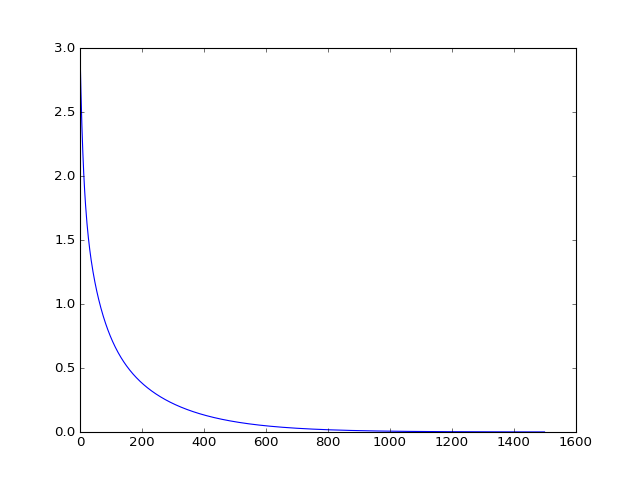

In [5]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1'})
print(data[:, 0])
fig = plt.figure()
plt.plot(times, data[:, 0])

In [6]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"data": data}
                     )
result.params.pretty_print()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0686e+00                                    1.92e+02    
       1              2         1.3858e+00      6.83e-01       1.03e-02       1.54e+02    
       2              4         9.8320e-01      4.03e-01       5.16e-03       2.35e+02    
       3              5         5.0532e-01      4.78e-01       1.03e-02       2.25e+02    
       4              6         1.9729e-01      3.08e-01       2.01e-02       2.40e+02    
       5              7         1.2687e-01      7.04e-02       2.23e-02       2.42e+02    
       6              8         3.2710e-02      9.42e-02       4.81e-03       1.62e+02    
       7              9         2.8367e-03      2.99e-02       1.42e-02       2.08e+01    
       8             10         1.4298e-04      2.69e-03       1.44e-02       5.08e+00    
       9             11         1.9592e-07      1.43e-04       2.97e-03       3.29e-01    